# Ejercicio 3

En este ejercicio abordaremos un problema de regresión supervisada usando un dataset real: el California Housing Dataset: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

# 1. Exploración y preprocesamiento:


In [19]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


#### Funciones auxiliares

In [20]:
# función para calcular metricas de regresión
def regression_metrics(y_true, y_pred):
    """
    Calcula las métricas de regresión: MSE, RMSE, MAE y R^2.
    Args:
        y_true (array-like): Valores verdaderos.
        y_pred (array-like): Valores predichos por el modelo."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

def metrics_model_by_data(data_name, y_true, y_pred):
    """
    Imprime las métricas de regresión para un modelo dado y sus predicciones.
    Args:
        data_name (str): Nombre del conjunto de datos.
        y_true (array-like): Valores verdaderos.
        y_pred (array-like): Valores predichos por el modelo.
    """
    mse, rmse, mae, r2 = regression_metrics(y_true, y_pred)
    print(f"Metricas para {data_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R^2: {r2:.4f}\n")


### Importación de los datos

In [21]:
data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.isnull().sum())
df.describe()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


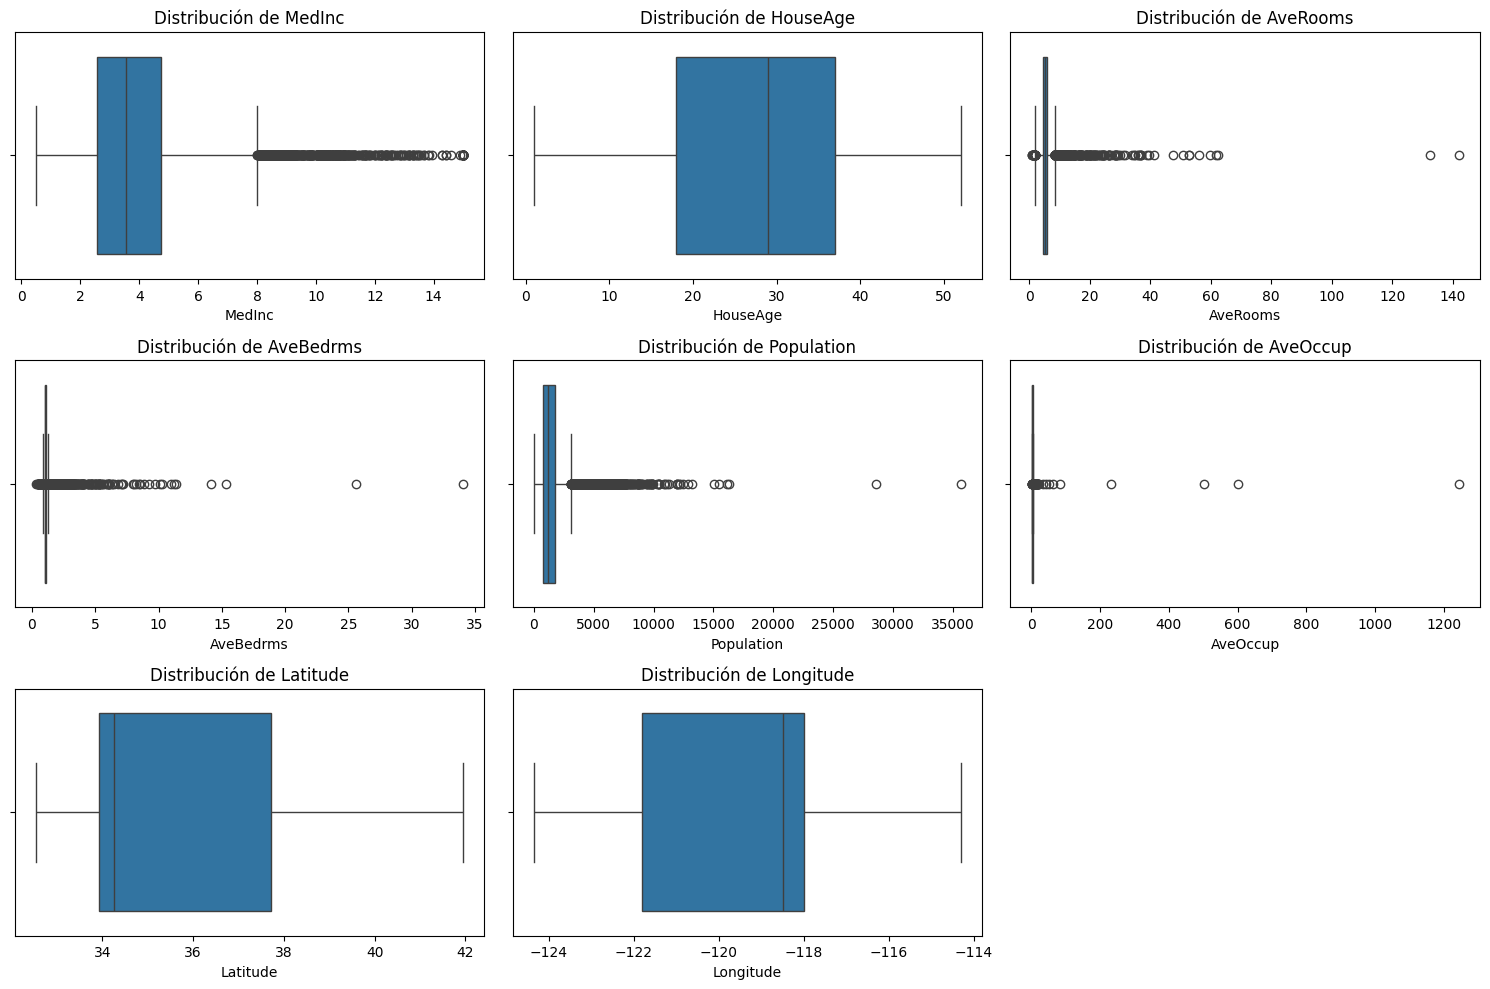

In [22]:
# Ver cuántos valores faltantes hay por columna
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns[:-1], 1):  # omitimos la variable objetivo
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

Explora los datos:


- ¿Cuántas observaciones y variables hay?  
Hay 1064 observaciones y 9 variables

- ¿Cuál es la variable objetivo (target)?  
La variable objetivo es MedHouseVal que indica el valor de una propiedad.

- ¿Hay valores faltantes?  
De acuerdo a la análisis anterior no hay datos faltante.

- Analiza la distribución de las variables con df.describe() y visualizaciones.  



### Preprocesamiento:




In [23]:
df_scaled = df.copy()

X = df_scaled.drop('MedHouseVal', axis=1)  # Variables independientes
y = df_scaled['MedHouseVal']  # Variable objetivo

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 2. División de los datos

In [24]:
# división de los datos
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)  # test = 20%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # val = 20%

# 3. Entrenamiento de modelos de regresión

## Modelo 1: Regresión Lineal

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_val_results = []

y_pred_val_lr = lr.predict(X_val)
y_pred_train_lr = lr.predict(X_train)

# Evaluación del modelo en el conjunto de Validación
metrics_model_by_data("Datos de Validación (Linear Regresion)", y_val, y_pred_val_lr)
metrics_model_by_data("Datos de Entrenamiento (Linear Regresion)", y_train, y_pred_train_lr)
# Coeficientes
print("Coeficientes de la regresión lineal:")
coef_lr = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': lr.coef_})
print(coef_lr)


Metricas para Datos de Validación (Linear Regresion):
  MSE: 0.5297
  RMSE: 0.7278
  MAE: 0.5333
  R^2: 0.6142

Coeficientes de la regresión lineal:
     Variable  Coeficiente
0      MedInc     0.865544
1    HouseAge     0.119795
2    AveRooms    -0.333937
3   AveBedrms     0.408633
4  Population    -0.009503
5    AveOccup    -0.038403
6    Latitude    -0.890302
7   Longitude    -0.861257


## Modelo 2: Regresión Polinómica

In [26]:
# sección de variables
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# entrenar el modelo de regresión lineal con características polinómicas
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# predecir en el conjunto de validación
y_pred_train_poly = lr_poly.predict(X_train_poly)
y_pred_val_poly = lr_poly.predict(X_val_poly)

# calcular métricas
metrics_model_by_data("Datos de Validación (Polynomial Regression)", y_val, y_pred_val_poly)
# metricas en el conjunto de entrenamiento
metrics_model_by_data("Datos de Entrenamiento (Polynomial Regression)", y_train, y_pred_train_poly)

Metricas para Datos de Validación (Polynomial Regression):
  MSE: 0.9113
  RMSE: 0.9546
  MAE: 0.4804
  R^2: 0.3363

Metricas para Datos de Entrenamiento (Polynomial Regression):
  MSE: 0.4213
  RMSE: 0.6490
  MAE: 0.4618
  R^2: 0.6820



- ¿Mejora el rendimiento respecto a la regresión lineal?  
A partir de las metricas con los datos de entrenamiento y validación en regresión polinomica, podemos decir que el modelo se sobreajusta, y no logra mejorar respecto al modelo de regresión lineal.

## Modelo 3: Árbol de decisión para regresión

In [27]:
tree = DecisionTreeRegressor(max_depth=5,random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [28]:
# predecir en el conjunto de validación
y_pred_val_tree = tree.predict(X_val)
# calcular métricas
metrics_model_by_data("Datos de Validación (Decision Tree)", y_val, y_pred_val_tree)

# predecir en el conjunto de entrenamiento
y_pred_train_tree = tree.predict(X_train)
# calcular métricas para el conjunto de entrenamiento
metrics_model_by_data("Datos de Entrenamiento (Decision Tree)", y_train, y_pred_train_tree)

# Coeficientes
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': tree.feature_importances_})
print(coef_df)


Metricas para Datos de Validación (Decision Tree):
  MSE: 0.5140
  RMSE: 0.7170
  MAE: 0.5258
  R^2: 0.6257

Metricas para Datos de Entrenamiento (Decision Tree):
  MSE: 0.4693
  RMSE: 0.6851
  MAE: 0.4994
  R^2: 0.6457

     Variable  Coeficiente
0      MedInc     0.740032
1    HouseAge     0.047155
2    AveRooms     0.000000
3   AveBedrms     0.001141
4  Population     0.003712
5    AveOccup     0.138020
6    Latitude     0.041797
7   Longitude     0.028143


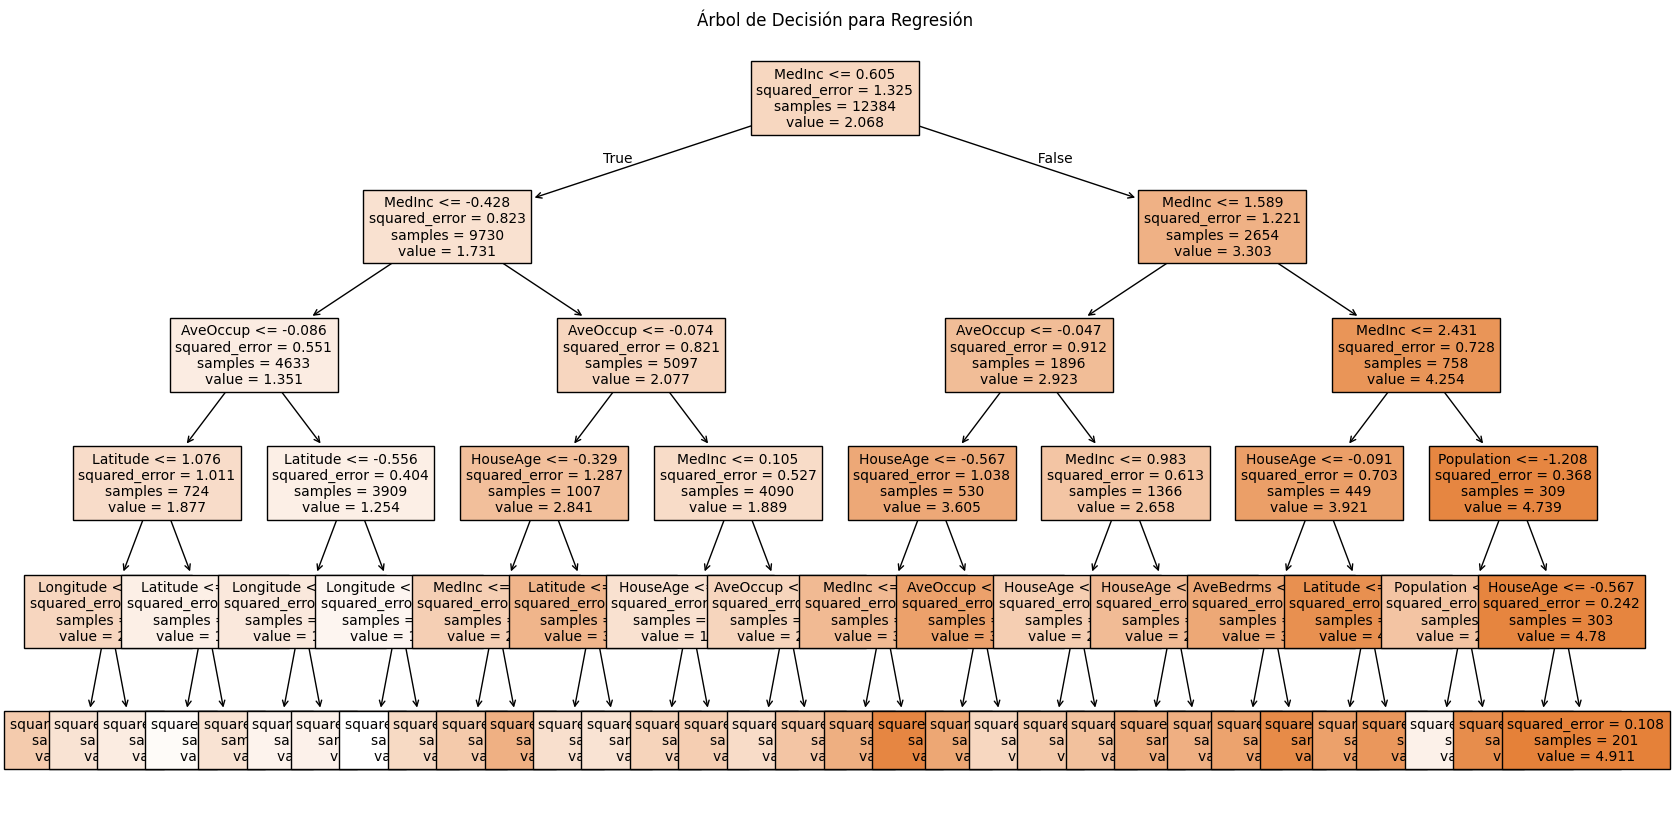

In [29]:
# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, filled=True, fontsize=10)
plt.title("Árbol de Decisión para Regresión")
plt.show()

- ¿El árbol sobreajusta o generaliza?  
La diferencia entre las metricas de los datos de valicación y entrenamiento, nos indican que debido a que no existen grandes diferencias, el modelo está generalizando.

## Modelo 4: Random Forest Regressor

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# predecir en el conjunto de validación
y_pred_val_rf = rf.predict(X_val)
# calcular métricas
metrics_model_by_data("Datos de Validación (Random Forest)", y_val, y_pred_val_rf)

# predecir en el conjunto de entrenamiento
y_pred_train_rf = rf.predict(X_train)
# calcular métricas para el conjunto de entrenamiento
metrics_model_by_data("Datos de Entrenamiento (Random Forest)", y_train, y_pred_train_rf)

# Coeficientes
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': rf.feature_importances_})
print(coef_df)

Metricas para Datos de Validación (Random Forest):
  MSE: 0.2598
  RMSE: 0.5097
  MAE: 0.3352
  R^2: 0.8108

Metricas para Datos de Entrenamiento (Random Forest):
  MSE: 0.0363
  RMSE: 0.1906
  MAE: 0.1240
  R^2: 0.9726

     Variable  Coeficiente
0      MedInc     0.524665
1    HouseAge     0.054399
2    AveRooms     0.041644
3   AveBedrms     0.029596
4  Population     0.030449
5    AveOccup     0.138201
6    Latitude     0.091436
7   Longitude     0.089610


- ¿Reduce el error comparado con un solo árbol?


## Modelo 5: Gradient Boosting Regressor

In [32]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [33]:
# predecir en el conjunto de validación
y_pred_val_gb = gb.predict(X_val)
# calcular métricas
metrics_model_by_data("Datos de Validación (Gradient Boosting)", y_val, y_pred_val_gb)

# predecir en el conjunto de entrenamiento
y_pred_train_gb = gb.predict(X_train)
# calcular métricas para el conjunto de entrenamiento
metrics_model_by_data("Datos de Entrenamiento (Gradient Boosting)", y_train, y_pred_train_gb)

# Coeficientes
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': gb.feature_importances_})
print(coef_df)

Metricas para Datos de Validación (Gradient Boosting):
  MSE: 0.2824
  RMSE: 0.5314
  MAE: 0.3706
  R^2: 0.7944

Metricas para Datos de Entrenamiento (Gradient Boosting):
  MSE: 0.2513
  RMSE: 0.5013
  MAE: 0.3491
  R^2: 0.8103

     Variable  Coeficiente
0      MedInc     0.600134
1    HouseAge     0.034655
2    AveRooms     0.020978
3   AveBedrms     0.005246
4  Population     0.002836
5    AveOccup     0.127493
6    Latitude     0.099465
7   Longitude     0.109193


- ¿Es el modelo más preciso? 

# 4. Evaluación de Modelos

In [34]:
# utilizamos el conjunto de prueba para evaluar el modelo final

# Regresión Lineal
y_pred_test_lr = lr.predict(X_test)

# Regresión Polinómica
X_test_poly = poly.transform(X_test)
y_pred_test_poly = lr_poly.predict(X_test_poly)

# Árbol de Decisión
y_pred_test_tree = tree.predict(X_test)

# Random Forest
y_pred_test_rf = rf.predict(X_test)

# Gradient Boosting
y_pred_test_gb = gb.predict(X_test)


### Analisis de metricas

In [35]:
# regresión lineal
metrics_model_by_data("Datos de Prueba (Linear Regression)", y_test, y_pred_test_lr)
# regresión polinómica
metrics_model_by_data("Datos de Prueba (Polynomial Regression)", y_test, y_pred_test_poly)
# árbol de decisión
metrics_model_by_data("Datos de Prueba (Decision Tree)", y_test, y_pred_test_tree)
# random forest
metrics_model_by_data("Datos de Prueba (Random Forest)", y_test, y_pred_test_rf)
# gradient boosting
metrics_model_by_data("Datos de Prueba (Gradient Boosting)", y_test, y_pred_test_gb)

Metricas para Datos de Prueba (Linear Regression):
  MSE: 0.5618
  RMSE: 0.7495
  MAE: 0.5333
  R^2: 0.5713

Metricas para Datos de Prueba (Polynomial Regression):
  MSE: 0.5370
  RMSE: 0.7328
  MAE: 0.4724
  R^2: 0.5902

Metricas para Datos de Prueba (Decision Tree):
  MSE: 0.5239
  RMSE: 0.7238
  MAE: 0.5176
  R^2: 0.6002

Metricas para Datos de Prueba (Random Forest):
  MSE: 0.2594
  RMSE: 0.5093
  MAE: 0.3318
  R^2: 0.8021

Metricas para Datos de Prueba (Gradient Boosting):
  MSE: 0.2894
  RMSE: 0.5380
  MAE: 0.3680
  R^2: 0.7791



### Resumen comparativo


Resumen de Métricas: Datos de Prueba


,Modelo,MSE,RMSE,MAE,R^2
0,Regresión Lineal,0.561790,0.749527,0.533302,0.571286
1,Regresión Polinómica,0.537018,0.732815,0.472417,0.590191
2,Árbol de Decisión,0.523887,0.723800,0.517614,0.600211
3,Random Forest,0.259391,0.509304,0.331819,0.802054
4,Gradient Boosting,0.289432,0.537989,0.368035,0.779128


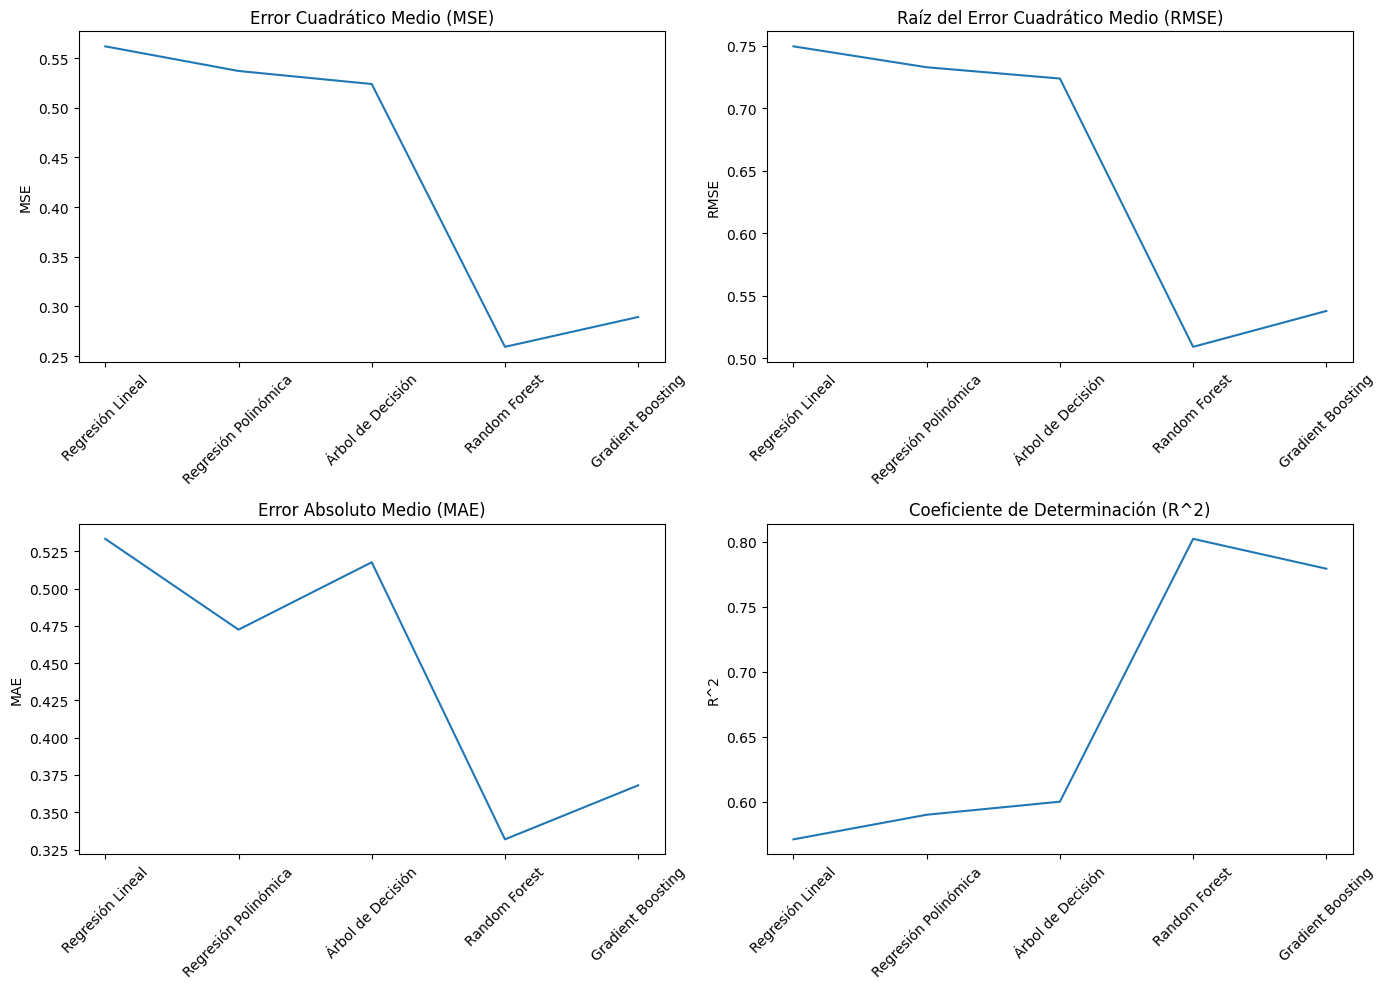

In [36]:
lr_metrics = regression_metrics(y_test, y_pred_test_lr)
lr_poly_metrics = regression_metrics(y_test, y_pred_test_poly)
tree_metrics = regression_metrics(y_test, y_pred_test_tree)
rf_metrics = regression_metrics(y_test, y_pred_test_rf)
gb_metrics = regression_metrics(y_test, y_pred_test_gb)
# Resumen de métricas

metrics_summary = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_metrics[0], lr_poly_metrics[0], tree_metrics[0], rf_metrics[0], gb_metrics[0]],
    'RMSE': [lr_metrics[1], lr_poly_metrics[1], tree_metrics[1], rf_metrics[1], gb_metrics[1]],
    'MAE': [lr_metrics[2], lr_poly_metrics[2], tree_metrics[2], rf_metrics[2], gb_metrics[2]],
    'R^2': [lr_metrics[3], lr_poly_metrics[3], tree_metrics[3], rf_metrics[3], gb_metrics[3]]
})

print("\nResumen de Métricas: Datos de Prueba")
display(metrics_summary)

# Visualización de las métricas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MSE
metricas = ['MSE', 'RMSE', 'MAE', 'R^2']
paletas = ['Blues', 'Greens', 'Oranges', 'Purples']
titulos = [
    'Error Cuadrático Medio (MSE)',
    'Raíz del Error Cuadrático Medio (RMSE)',
    'Error Absoluto Medio (MAE)',
    'Coeficiente de Determinación (R^2)'
]

for i, (metrica, paleta, titulo) in enumerate(zip(metricas, paletas, titulos)):
    row, col = divmod(i, 2)
    sns.lineplot(x='Modelo', y=metrica, data=metrics_summary, ax=axs[row, col])
    axs[row, col].set_title(titulo)
    axs[row, col].set_ylabel(metrica)
    axs[row, col].set_xlabel('')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 5. Análisis crítico y preguntas
Responde con tus observaciones:
¿Qué modelo tuvo mejor desempeño? ¿Por qué?  


¿Qué variables parecen más relevantes para explicar el precio de la vivienda?  


¿Qué modelo elegirías para explicar los resultados a un público general? ¿Por qué?  


¿Hay signos de overfitting en algunos modelos?  


¿Qué modelo ofrece el mejor compromiso entre interpretabilidad y precisión?  
